# Transformacija podataka

### Importovanje potrebnih biblioteka

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook', style='whitegrid', palette='pastel', font_scale=1.2)

### Učitavanje podataka

In [2]:
# Učitavanje i pregled podataka
file_path = "Product Sales Data.xlsx"
data = pd.read_excel(file_path)

# Prikaz dimenzija podataka
print(f"Podaci sadrže {data.shape[0]} redova i {data.shape[1]} kolona.")

Podaci sadrže 700 redova i 16 kolona.


### Pregled i analiza podataka

In [3]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,Carretera,NaN,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
1,Government,Germany,Paseo,NaN,1006.0,10,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014
2,Government,Canada,Paseo,NaN,1725.0,10,350,603750.0,0.0,603750.0,448500.0,155250.0,2013-11-01,11,November,2013
3,Government,Germany,Paseo,NaN,1513.0,10,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
4,Government,Germany,Velo,NaN,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

Pregledom prvih nekoliko redova podataka stičemo uvid u to kako podaci izgledaju i koje kolone postoje. Funkcija info() nam daje informacije o tipovima podataka u svakoj koloni i o eventualnim nedostajućim vrednostima.

### Identifikacija nedostajućih vrednosti i jedinstvenih vrednosti

In [5]:
# Provera nedostajućih vrednosti
print("Nedostajuće vrednosti po kolonama:")
print(data.isnull().sum())

Nedostajuće vrednosti po kolonama:
Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64


In [6]:
# Provera jedinstvenih vrednosti po koloni
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}: {unique_values} jedinstvenih vrednosti")

Segment: 5 jedinstvenih vrednosti
Country: 5 jedinstvenih vrednosti
Product: 6 jedinstvenih vrednosti
Discount Band: 3 jedinstvenih vrednosti
Units Sold: 510 jedinstvenih vrednosti
Manufacturing Price: 6 jedinstvenih vrednosti
Sale Price: 7 jedinstvenih vrednosti
Gross Sales: 550 jedinstvenih vrednosti
Discounts: 515 jedinstvenih vrednosti
 Sales: 559 jedinstvenih vrednosti
COGS: 545 jedinstvenih vrednosti
Profit: 557 jedinstvenih vrednosti
Date: 16 jedinstvenih vrednosti
Month Number: 12 jedinstvenih vrednosti
Month Name: 12 jedinstvenih vrednosti
Year: 2 jedinstvenih vrednosti


Proveravamo koliko nedostajućih vrednosti ima u svakoj koloni. Takođe, proveravamo koliko jedinstvenih vrednosti ima u svakoj koloni kako bismo identifikovali potencijalne kategorijske i numeričke kolone.

In [7]:
# Pregled jedinstvenih vrednosti u koloni 'Discount Band'
print("Jedinstvene vrednosti u koloni 'Discount Band':")
print(data['Discount Band'].unique())

Jedinstvene vrednosti u koloni 'Discount Band':
[nan 'Low' 'Medium' 'High']


Identifikovali smo da kolona 'Discount Band' ima nedostajuće vrednosti. Pretpostavljamo da tamo gde nema vrednosti, nije bilo popusta, pa nedostajuće vrednosti popunjavamo sa 'No Discount'.



In [8]:
# Popunjavanje nedostajućih vrednosti u koloni 'Discount Band'
data['Discount Band'].fillna('No Discount', inplace=True)

### Provera duplikata

Proveravamo da li u podacima postoje duplirani redovi koji bi mogli negativno da utiču na analizu i modele mašinskog učenja.



In [9]:
# Provera dupliranih redova
duplicates = data.duplicated().sum()
print(f"Broj dupliranih redova: {duplicates}")

Broj dupliranih redova: 0


### Deskriptivna analiza

In [10]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [11]:
# Identifikacija kategoričkih kolona
categorical_columns = data.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['Segment', 'Country', 'Product', 'Discount Band', 'Month Name']


In [12]:
categorical_columns.remove('Month Name')

In [13]:
# Identifikacija numeričkih kolona
numerical_columns = data.select_dtypes(exclude='object').columns.tolist()
print(numerical_columns)

['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Year']


In [14]:
numerical_columns.remove('Month Number')
numerical_columns.remove('Date')
numerical_columns.remove('Year')

In [15]:
data['Gross Sales']

0      529550.0
1      352100.0
2      603750.0
3      529550.0
4      352100.0
         ...   
695     24210.0
696     38385.0
697    135625.0
698     17625.0
699     10968.0
Name: Gross Sales, Length: 700, dtype: float64

### Vizuelizacija podataka

#### Vizuelizacija numeričkih atributa

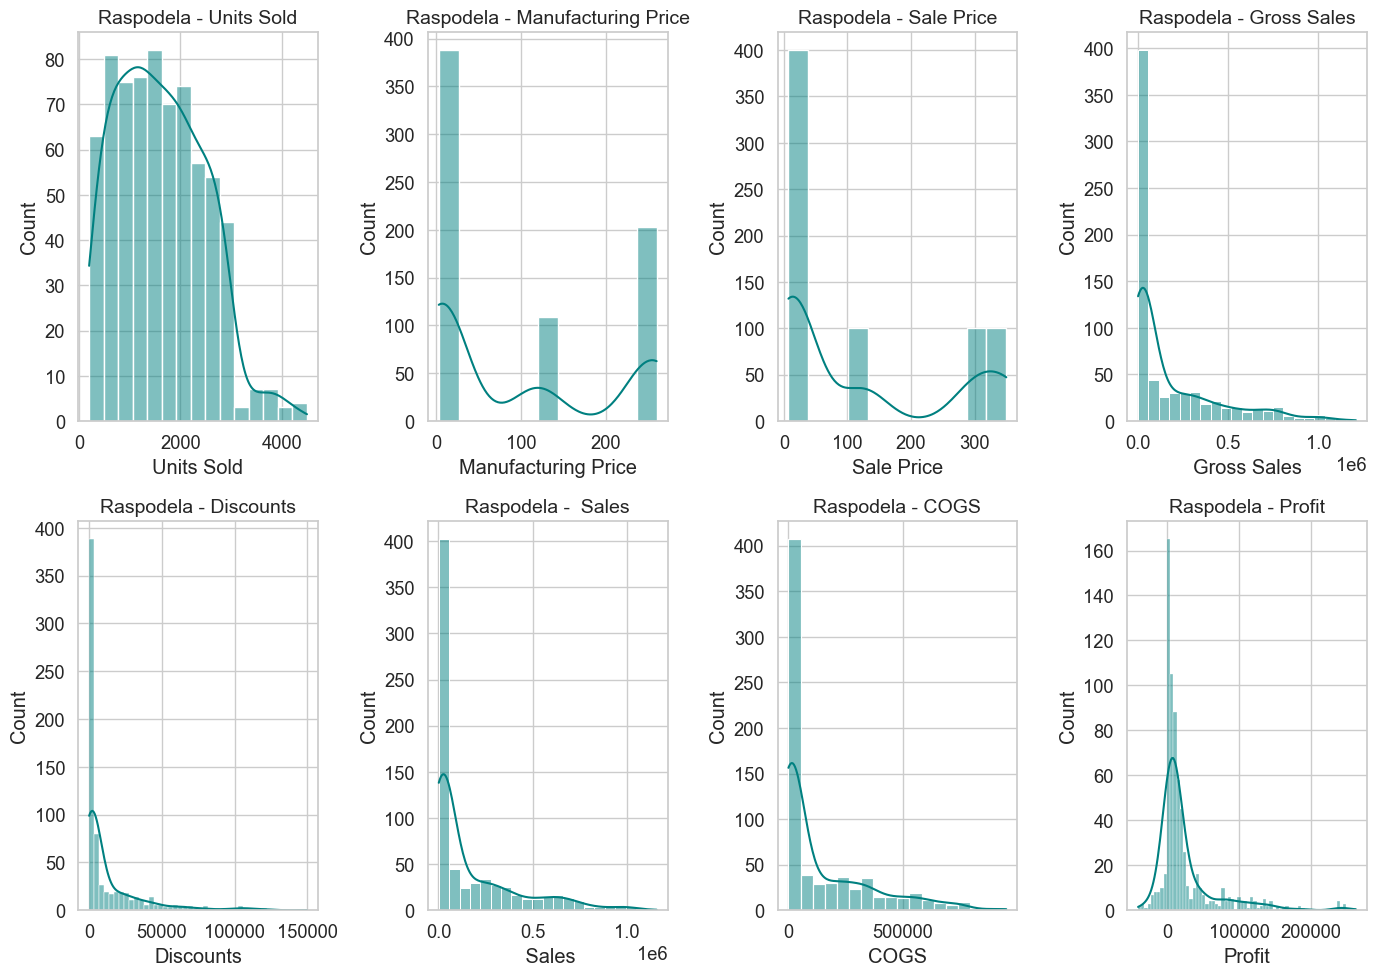

In [16]:
def visualize_numerical_features(data):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(2, 4, i)
        sns.histplot(data[column], kde=True, color='teal')
        plt.title(f'Raspodela - {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

visualize_numerical_features(data)

##### Ključne tačke analize numeričkih atributa:

1. Units Sold: Raspodela pokazuje blagi pozitivan "skew" - većina prodaja je koncentrisana na niže vrednosti, sa nekoliko ekstremno visokih vrednosti.
2. Manufacturing Price i Sale Price: Postoji nekoliko diskretnih vrednosti koje dominiraju, što ukazuje na ograničene cenovne razrede za proizvode.
3. Gross Sales, Discounts, Sales, COGS: Sve ove promenljive imaju veliki pozitivan "skew" sa većinom podataka u nižem opsegu vrednosti i nekoliko ekstremnih vrednosti.
4. Profit: Asimetrična raspodela sa nekoliko čestih vrednosti, ukazujući na moguće strateške tačke u određivanju cena.

#### Vizuelizacija kategorijskih atributa

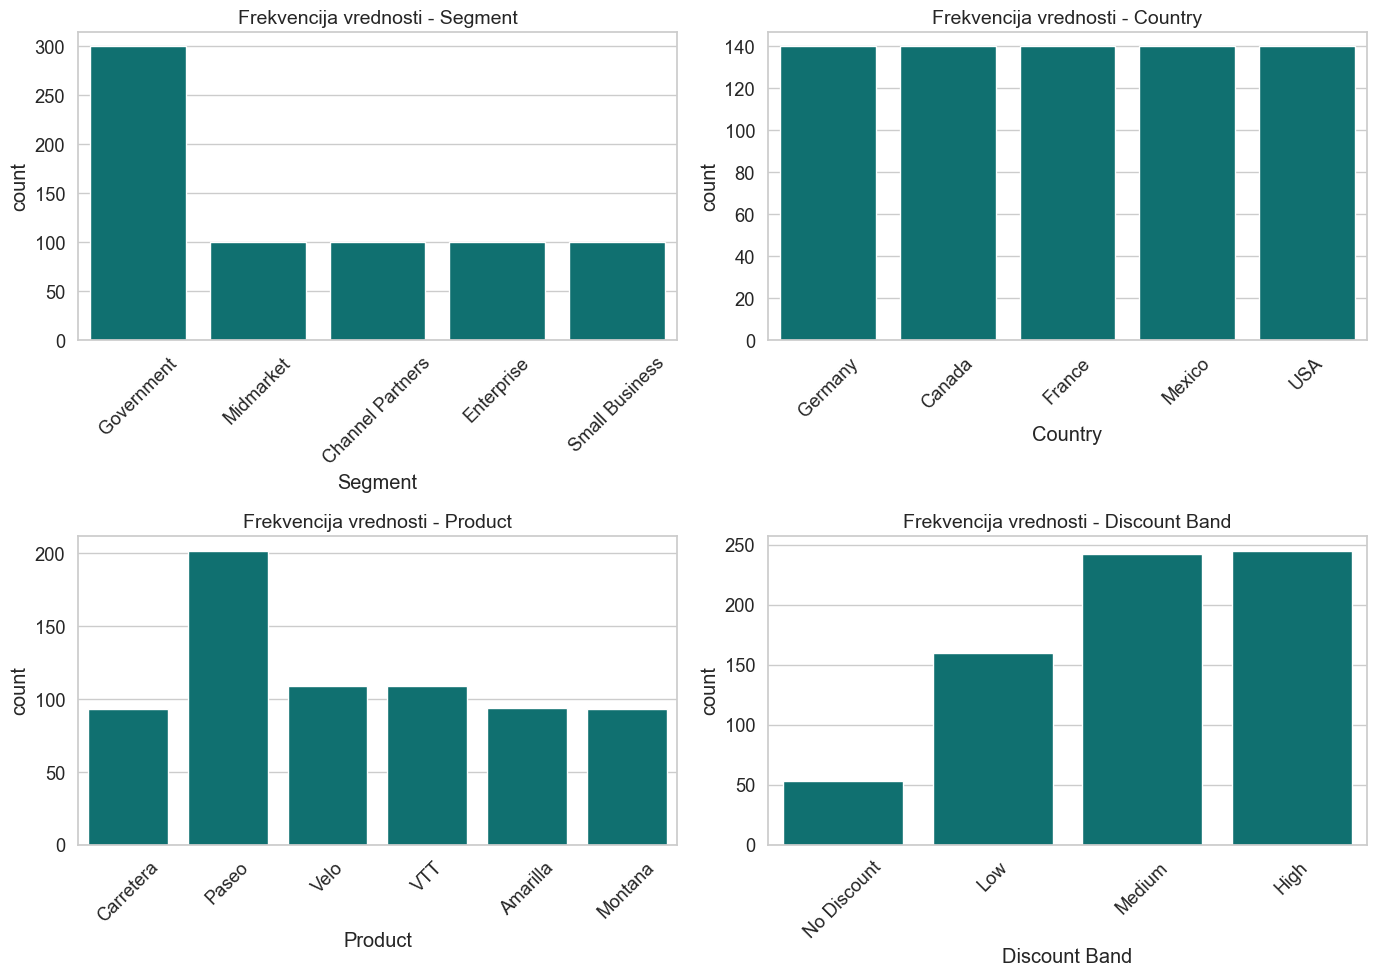

In [17]:
def visualize_categorical_features(data):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(x=column, data=data, color='teal')  
        plt.title(f'Frekvencija vrednosti - {column}', fontsize=14)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_categorical_features(data)

##### Ključne tačke analize kategorickih atributa:

1. Segment: Segment "Government" ima značajno veću frekvenciju u poređenju sa ostalim segmentima, koji su približno jednako zastupljeni.
2. Country: Zemlje su ravnomerno zastupljene, bez značajnih razlika u frekvenciji.
3. Product: Proizvod "Paseo" je najčešći, dok ostali proizvodi imaju sličnu frekvenciju.
4. iscount Band: Većina transakcija ima srednji ili visoki popust, dok je broj transakcija bez popusta relativno nizak.

### Skaliranje podataka

#### Standardizacija (Z-score)

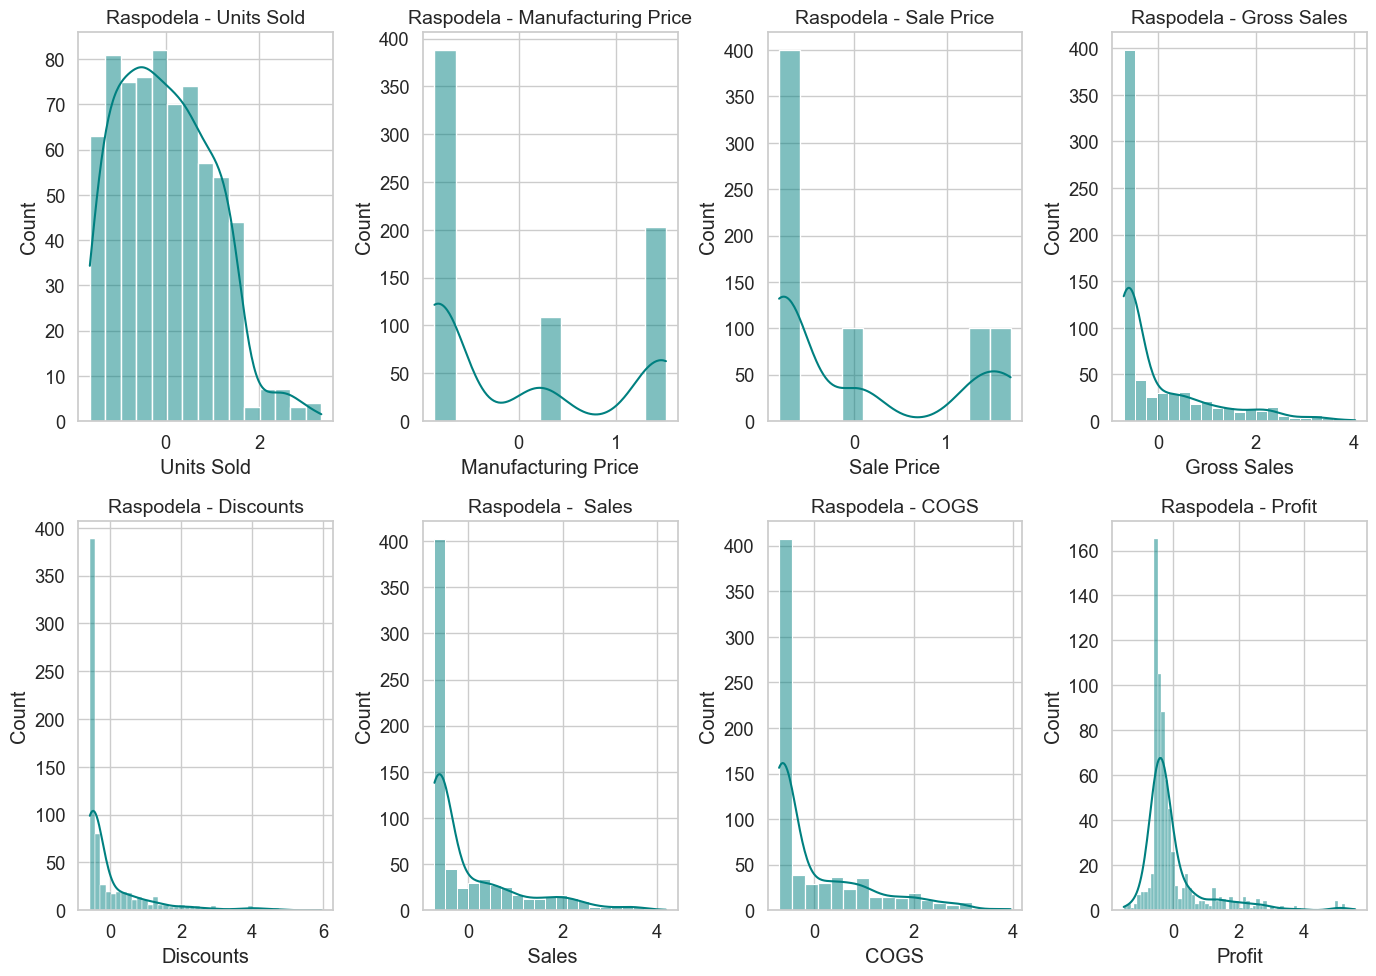

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

visualize_numerical_features(data_standardized)


Nakon standardizacije, svi numerički atributi imaju srednju vrednost nula i standardnu devijaciju jedan.
Oblik raspodele ostaje isti, s time da su sve vrednosti skalarno transformisane, što olakšava poređenje između atributa sa različitim jedinicama ili opsezima.
Ekstremne vrednosti su i dalje prisutne, ali sada u standardizovanom obliku, što sugeriše da bi dalja obrada outliera mogla biti potrebna za stabilnije modele.

#### Min-Max skaliranje

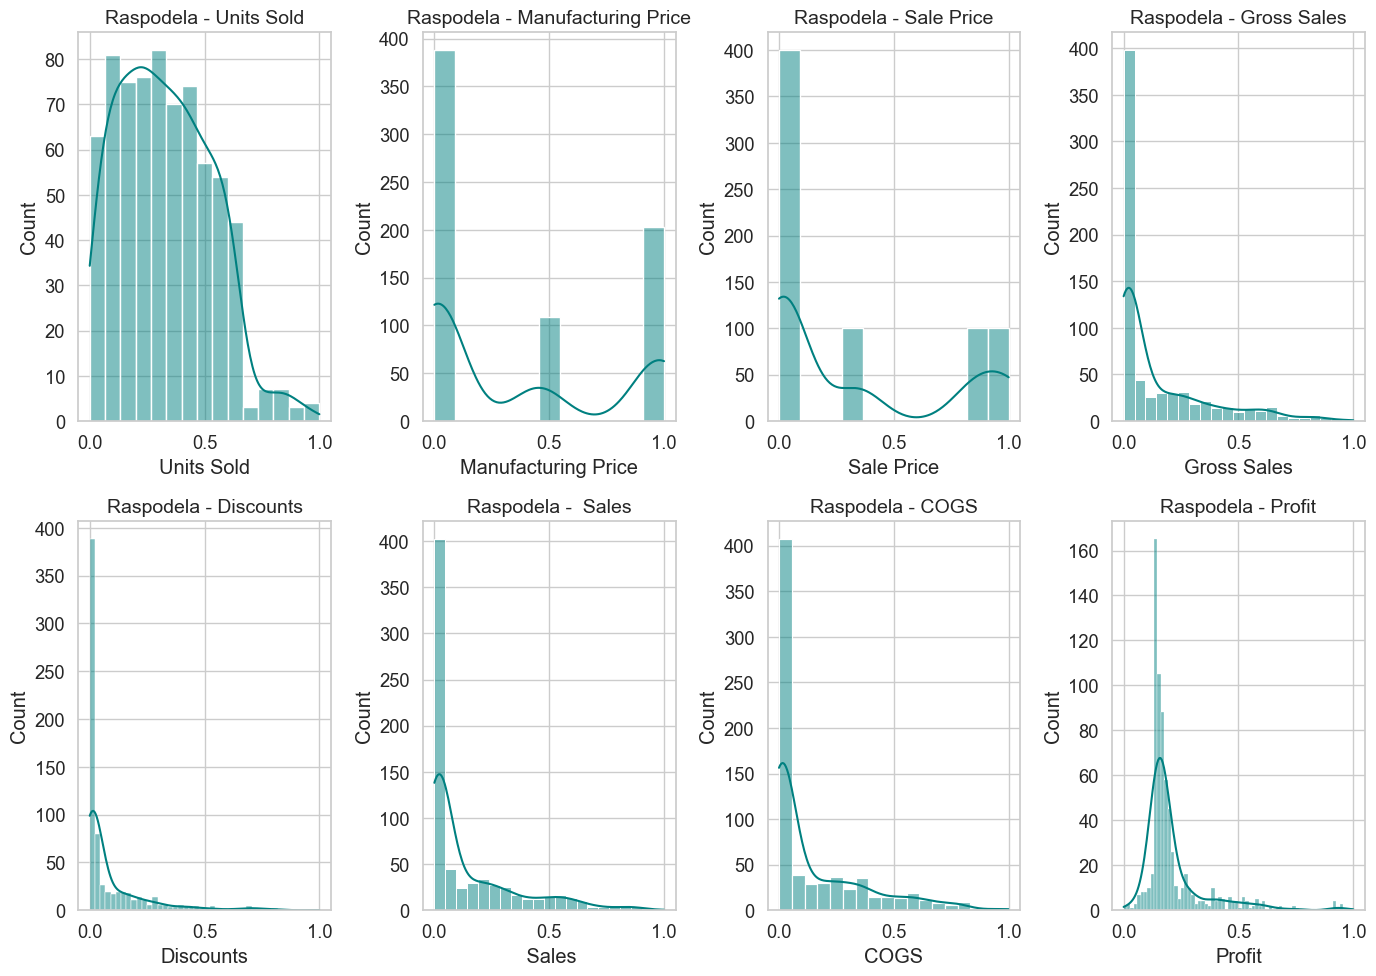

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

visualize_numerical_features(data_minmax_scaled)


Nakon Min-Max skaliranja, svi numerički atributi su transformisani na opseg između 0 i 1.
Oblik raspodele atributa ostaje nepromenjen, ali su svi podaci skalarno kompresovani unutar novog opsega, što omogućava bolju usporedbu atributa.
Ekstremne vrednosti su još uvek prisutne i sada su prikazane na krajevima opsega (blizu 0 ili 1), što olakšava njihovu identifikaciju i dalje rukovanje.

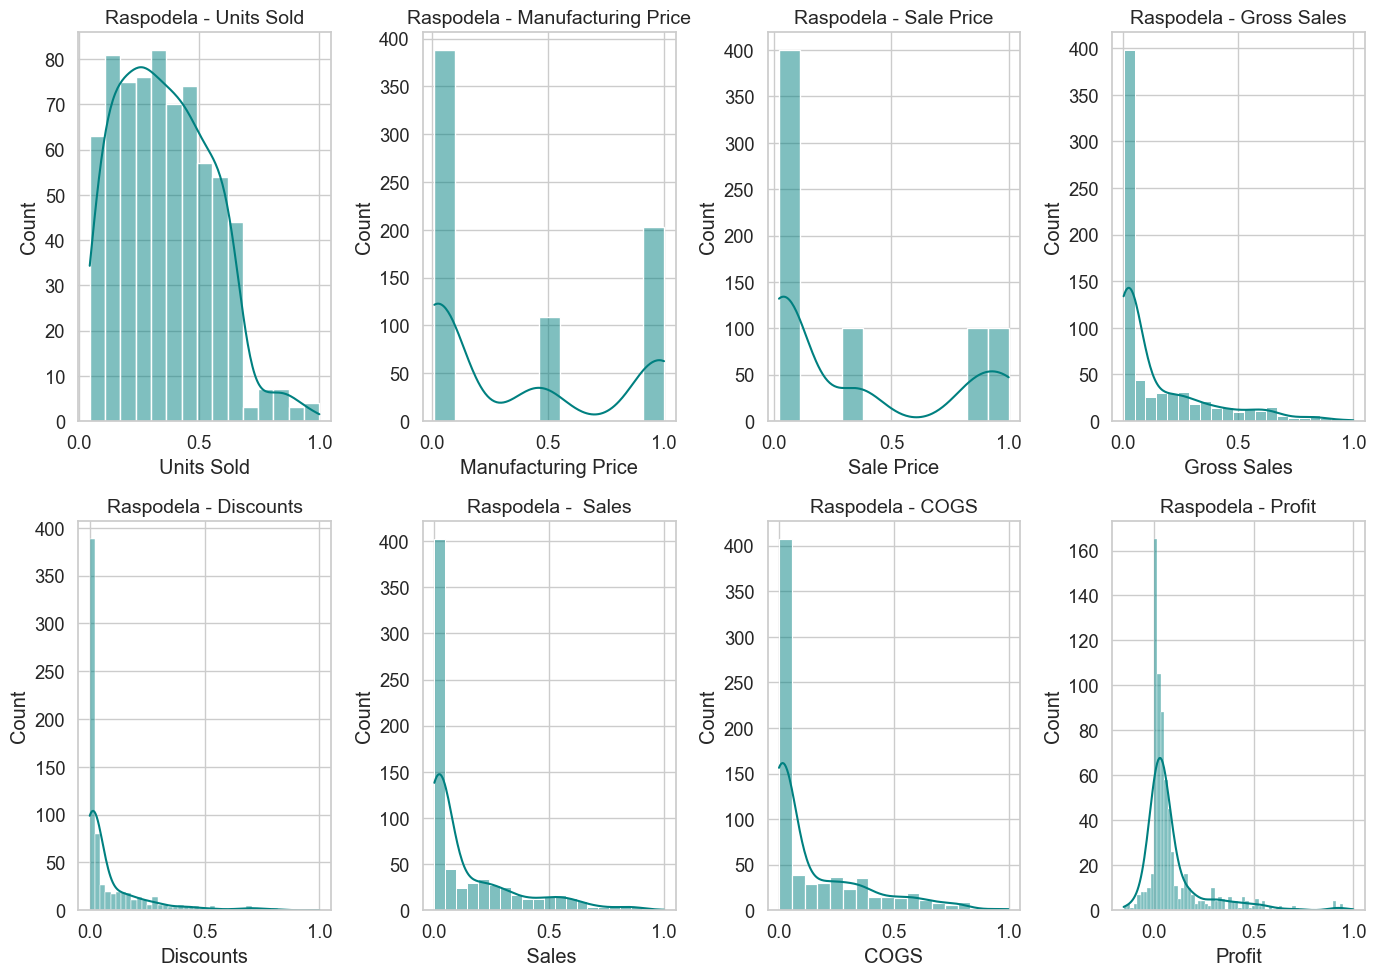

In [20]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
data_maxabs_scaled = data.copy()
data_maxabs_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

visualize_numerical_features(data_maxabs_scaled)


Nakon MaxAbs skaliranja, svi numerički atributi su transformisani na opseg između -1 i 1, gde su apsolutne vrednosti maksimalno normalizovane.
Oblik raspodele atributa ostaje isti, ali su sve vrednosti prilagođene novom opsegu, što olakšava rad sa atributima koji imaju različite jedinice.
Ekstremne vrednosti su prisutne i vidljive na krajevima opsega (blizu -1 ili 1), što omogućava njihovu dalju analizu i potencijalnu obradu.

#### Robust skaliranje

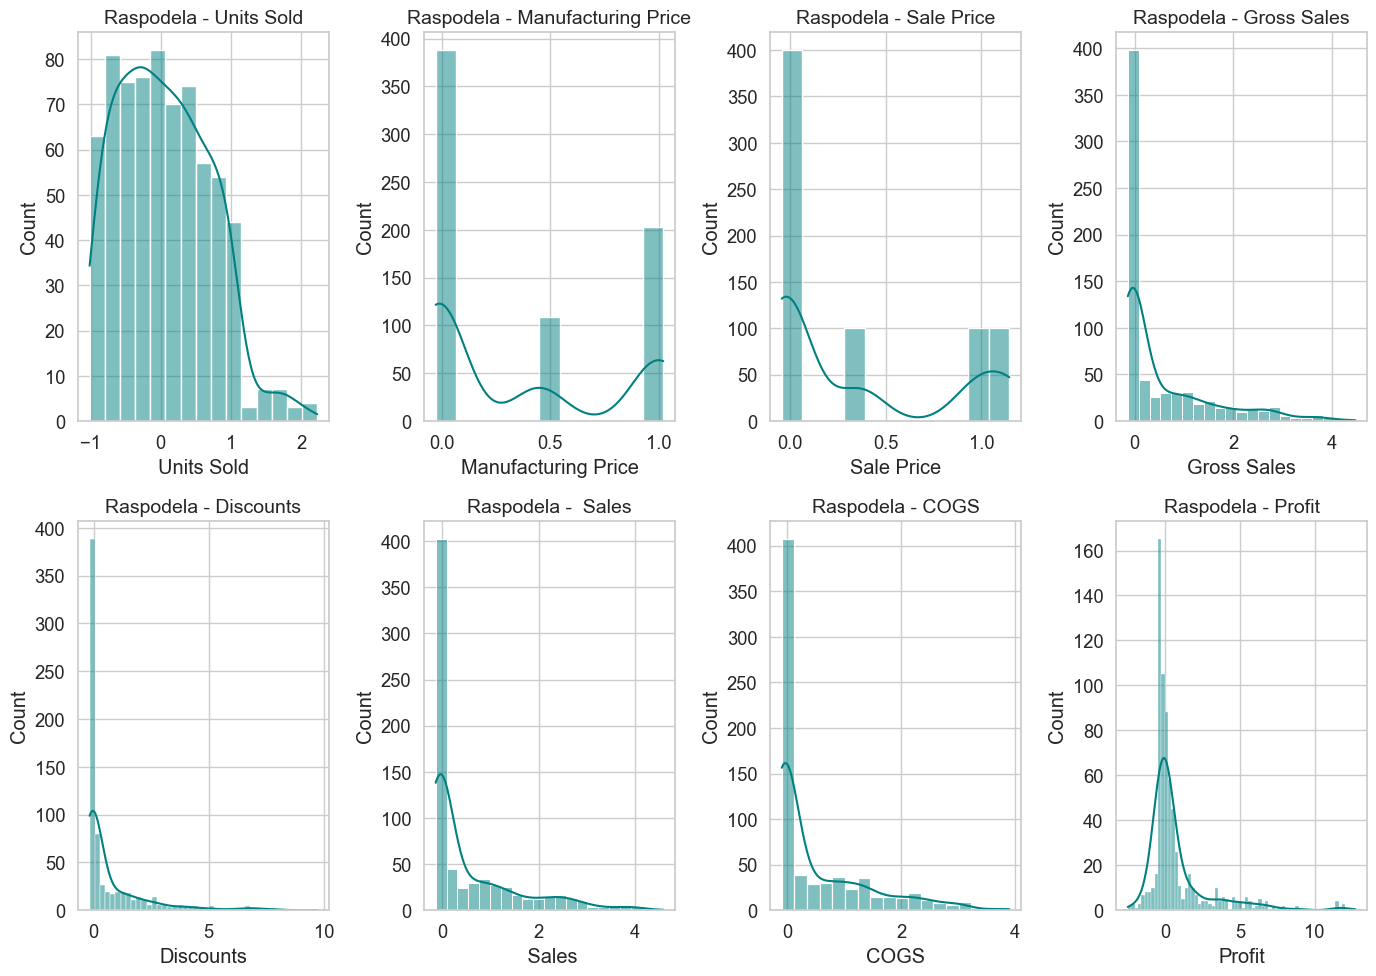

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_robust_scaled = data.copy()
data_robust_scaled[numerical_columns] = scaler.fit_transform(data[numerical_columns])

visualize_numerical_features(data_robust_scaled)

Nakon primene Robust skaliranja, svi numerički atributi su transformisani na način koji je manje osetljiv na outliere jer koristi medijanu i interkvartilni opseg (IQR) za skaliranje.
Oblik raspodele atributa ostaje relativno stabilan, ali se smanjuje uticaj ekstremnih vrednosti, što omogućava bolju robusnost podataka.
I dalje su prisutne, ali su manje izražene u poređenju sa drugim metodama skaliranja, što sugeriše da je Robust skaliranje pogodnije za rad sa podacima koji sadrže outliere.

### Transformacije koje menjaju raspodelu podataka

In [22]:
import numpy as np

def diagnostic_plots(original_data, transformed_data, original_title, transformed_title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(original_data, bins=30, kde=True, color='teal')
    plt.title(original_title)
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, bins=30, kde=True, color='salmon')
    plt.title(transformed_title)
    plt.show()


#### Logaritamska transformacija

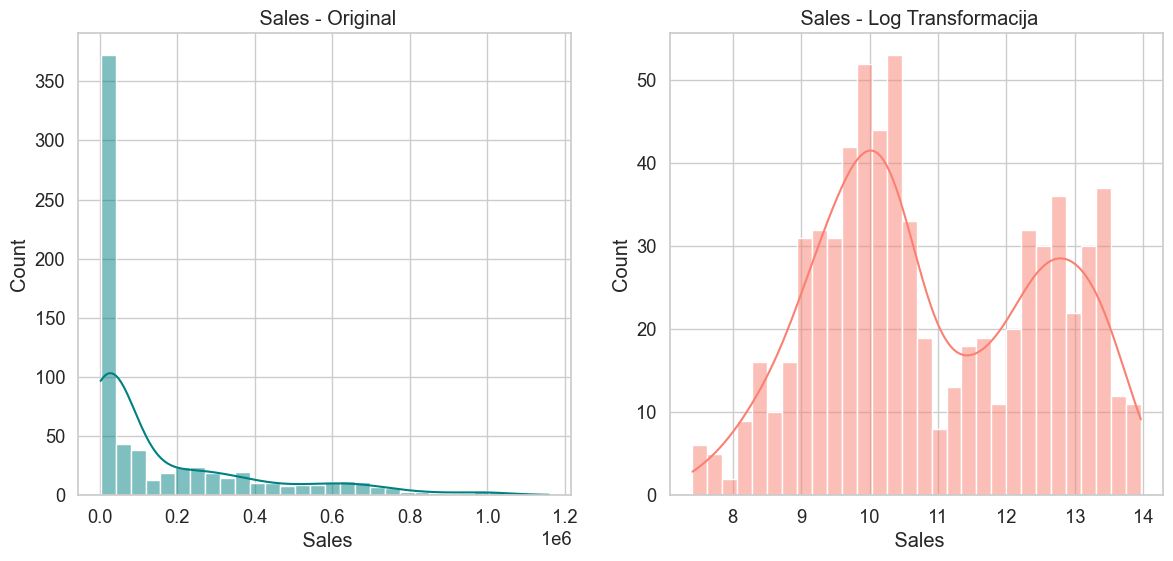

In [23]:
data_log_transformed = data.copy()
data_log_transformed[' Sales'] = np.log1p(data_log_transformed[' Sales'])

diagnostic_plots(data[' Sales'], data_log_transformed[' Sales'], ' Sales - Original', ' Sales - Log Transformacija')


In [24]:
data['Gross Sales']

0      529550.0
1      352100.0
2      603750.0
3      529550.0
4      352100.0
         ...   
695     24210.0
696     38385.0
697    135625.0
698     17625.0
699     10968.0
Name: Gross Sales, Length: 700, dtype: float64

Nakon primene log transformacije, distribucija Sales postaje manje asimetrična, ali zadržava više modova (vrhova).
Logaritamska transformacija se pokazala efikasnom u smanjenju "skewness" efekta, ali distribucija i dalje pokazuje multimodalne karakteristike.

#### Box Cox transformacija

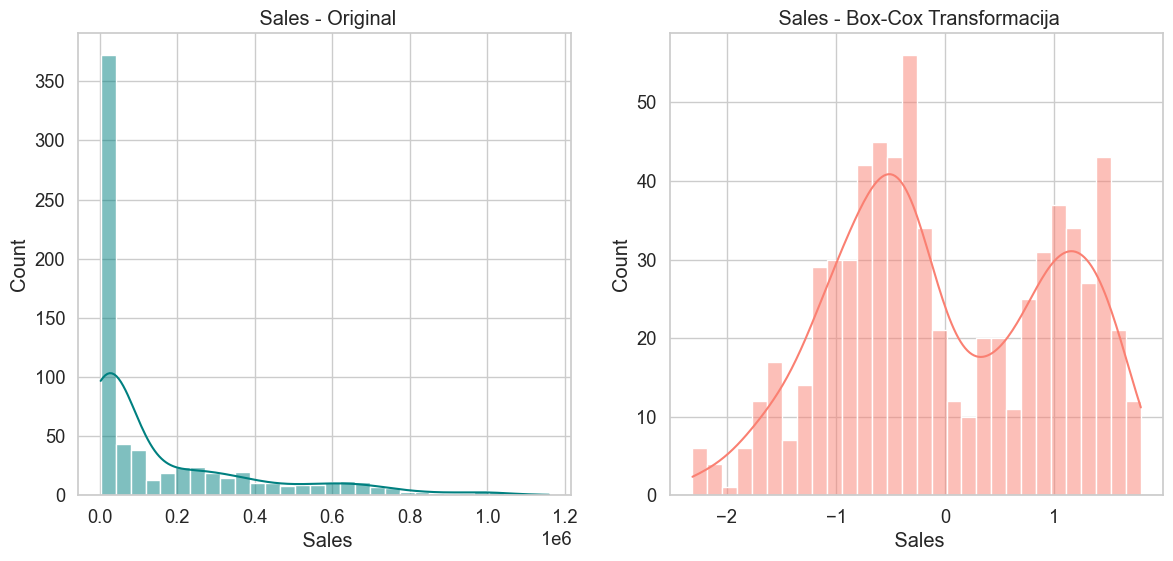

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
data_boxcox_transformed = data.copy()
data_boxcox_transformed[' Sales'] = pt.fit_transform(data[[' Sales']])

diagnostic_plots(data[' Sales'], data_boxcox_transformed[' Sales'], ' Sales - Original', ' Sales - Box-Cox Transformacija')


In [26]:
data['Gross Sales']

0      529550.0
1      352100.0
2      603750.0
3      529550.0
4      352100.0
         ...   
695     24210.0
696     38385.0
697    135625.0
698     17625.0
699     10968.0
Name: Gross Sales, Length: 700, dtype: float64

Box-Cox transformacija je primenjena i distribucija je postala približnije normalnoj, ali i dalje postoje pikovi (modovi) u distribuciji.

Koristi se za podatke koji sadrže samo pozitivne vrednosti i smanjuje asimetričnost efikasnije od log transformacije.

#### Kvantilna transformacija

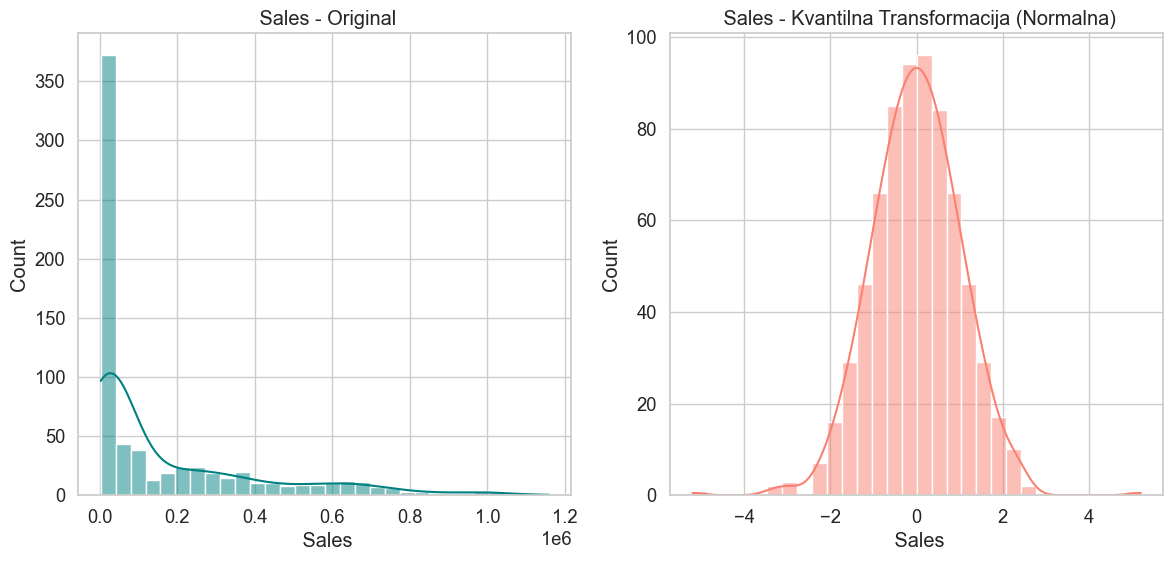

In [27]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0)
data_quantile_transformed = data.copy()
data_quantile_transformed[' Sales'] = qt.fit_transform(data[[' Sales']])

diagnostic_plots(data[' Sales'], data_quantile_transformed[' Sales'], ' Sales - Original', ' Sales - Kvantilna Transformacija (Normalna)')


In [28]:
data['Gross Sales']

0      529550.0
1      352100.0
2      603750.0
3      529550.0
4      352100.0
         ...   
695     24210.0
696     38385.0
697    135625.0
698     17625.0
699     10968.0
Name: Gross Sales, Length: 700, dtype: float64

Kvantilna transformacija transformiše distribuciju u približnu normalnu, gde je jasno vidljivo da su podaci redistribuirani kako bi se prilagodili normalnom obliku.

Ova transformacija je najefikasnija u postizanju normalne distribucije, što može biti korisno za modele koji zahtevaju normalno distribuirane podatke.

#### Yeo Johnson transformacija

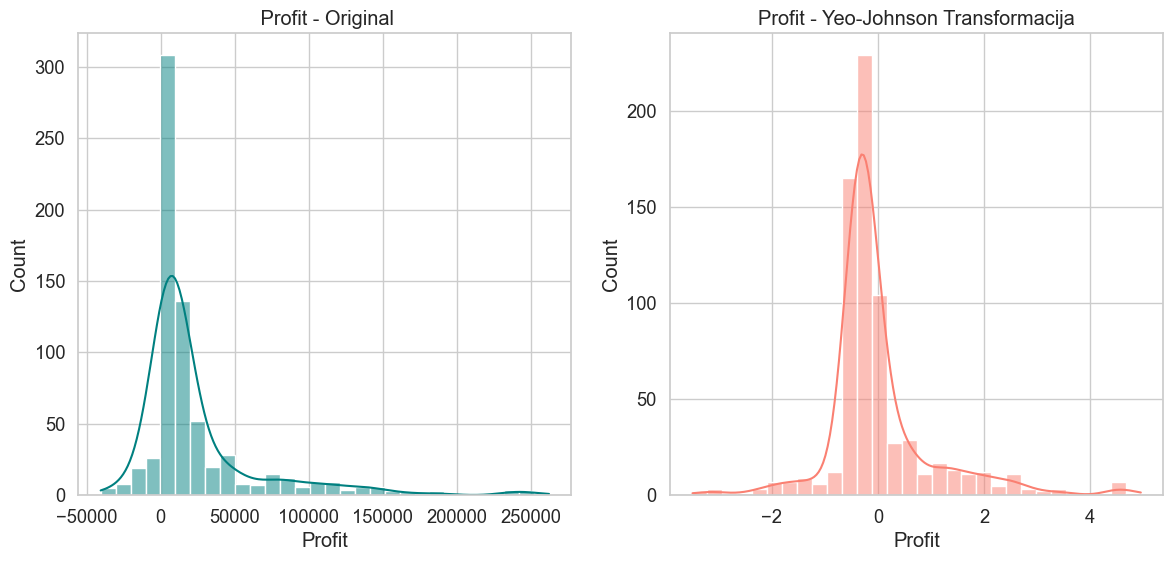

In [29]:
pt = PowerTransformer(method='yeo-johnson')
data_yeojohnson_transformed = data.copy()
data_yeojohnson_transformed['Profit'] = pt.fit_transform(data[['Profit']])

diagnostic_plots(data['Profit'], data_yeojohnson_transformed['Profit'], ' Profit - Original', 'Profit - Yeo-Johnson Transformacija')


In [30]:
data['Gross Sales']

0      529550.0
1      352100.0
2      603750.0
3      529550.0
4      352100.0
         ...   
695     24210.0
696     38385.0
697    135625.0
698     17625.0
699     10968.0
Name: Gross Sales, Length: 700, dtype: float64

Yeo-Johnson transformacija se posebno preporučuje za podatke koji sadrže negativne vrednosti, kao što je slučaj sa Profit kolonom. Transformacija uspešno smanjuje asimetričnost i prilagođava podatke za dalje modeliranje.

### Enkodiranje kategorickih atributa

#### Pregled kategorickih kolona

In [31]:
for col in categorical_columns:
    unique_vals = data[col].unique()
    print(f"Kolona: {col}")
    print(f"Broj jedinstvenih vrednosti: {len(unique_vals)}")
    print(f"Jedinstvene vrednosti: {unique_vals}")
    print()


Kolona: Segment
Broj jedinstvenih vrednosti: 5
Jedinstvene vrednosti: ['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']

Kolona: Country
Broj jedinstvenih vrednosti: 5
Jedinstvene vrednosti: ['Germany' 'Canada' 'France' 'Mexico' 'USA']

Kolona: Product
Broj jedinstvenih vrednosti: 6
Jedinstvene vrednosti: ['Carretera' 'Paseo' 'Velo' 'VTT' 'Amarilla' 'Montana']

Kolona: Discount Band
Broj jedinstvenih vrednosti: 4
Jedinstvene vrednosti: ['No Discount' 'Low' 'Medium' 'High']



#### One-Hot enkodiranje

In [32]:
one_hot_columns = ['Segment', 'Country', 'Product']
data_one_hot = pd.get_dummies(data, columns=one_hot_columns)

print(data_one_hot)

    Discount Band  Units Sold  Manufacturing Price  Sale Price  Gross Sales  \
0     No Discount      1513.0                    3         350     529550.0   
1     No Discount      1006.0                   10         350     352100.0   
2     No Discount      1725.0                   10         350     603750.0   
3     No Discount      1513.0                   10         350     529550.0   
4     No Discount      1006.0                  120         350     352100.0   
..            ...         ...                  ...         ...          ...   
695          High      1614.0                   10          15      24210.0   
696          High      2559.0                   10          15      38385.0   
697          High      1085.0                   10         125     135625.0   
698          High      1175.0                   10          15      17625.0   
699          High       914.0                   10          12      10968.0   

     Discounts      Sales      COGS     Profit     

One-Hot enkodiranje je primenjeno na kolone Segment, Country i Product. Ova tehnika kreira binarne kolone za svaku kategoriju. Na primer, kolona Segment ima pod-kolone koje označavaju prisustvo svake vrednosti.

Prednosti: Jednostavno za implementaciju i koristi se za nominalne kategorije (kategorije bez redosleda).

Nedostaci: Povećava dimenzionalnost skupa podataka, što može dovesti do problema sa memorijom kod većih skupova podataka.

#### Dummy enkodiranje

In [33]:
dummy_columns = ['Segment', 'Country', 'Product']
data_dummy = pd.get_dummies(data, columns=dummy_columns, drop_first=True)

# Prikaz rezultata
print(data_dummy)

    Discount Band  Units Sold  Manufacturing Price  Sale Price  Gross Sales  \
0     No Discount      1513.0                    3         350     529550.0   
1     No Discount      1006.0                   10         350     352100.0   
2     No Discount      1725.0                   10         350     603750.0   
3     No Discount      1513.0                   10         350     529550.0   
4     No Discount      1006.0                  120         350     352100.0   
..            ...         ...                  ...         ...          ...   
695          High      1614.0                   10          15      24210.0   
696          High      2559.0                   10          15      38385.0   
697          High      1085.0                   10         125     135625.0   
698          High      1175.0                   10          15      17625.0   
699          High       914.0                   10          12      10968.0   

     Discounts      Sales      COGS     Profit     

Ova varijanta one-hot enkodiranja eliminiše jednu kategoriju (kolonu) kako bi se izbegla multikolinearnost.

Prednosti: Smatra se efikasnijim jer sprečava redundantnost i multikolinearnost u skupu podataka.

Nedostaci: Kao i klasično one-hot enkodiranje, može dovesti do povećane dimenzionalnosti.

#### Label enkodiranje

In [34]:
from sklearn.preprocessing import LabelEncoder
data_encoded = data.copy()
le = LabelEncoder()
data_encoded['Discount Band Label'] = le.fit_transform(data['Discount Band'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Enkodiranje za 'Discount Band':", label_mapping)


Label Enkodiranje za 'Discount Band': {'High': 0, 'Low': 1, 'Medium': 2, 'No Discount': 3}


Label enkodiranje je primenjeno na kolonu Discount Band. Svaka kategorija u koloni je enkodirana odgovarajućim brojem (High: 0, Low: 1, Medium: 2, No Discount: 3).

Prednosti: Enkoder daje jednostavnu numeričku reprezentaciju kategorija i koristi se kada postoji hijerarhijski odnos među kategorijama.

Nedostaci: Nije pogodan za nominalne kategorije bez reda jer može dovesti model u zabludu da postoji prirodni poredak.

#### Ordinalno enkodiranje

In [35]:
from sklearn.preprocessing import OrdinalEncoder
data_ordinal_encoded = data.copy()
# Definisanje redosleda kategorija
discount_order = ['No Discount', 'Low', 'Medium', 'High']
ordinal_encoder = OrdinalEncoder(categories=[discount_order])

# Primena ordinalnog enkodiranja
data_ordinal_encoded['Discount Band Ordinal'] = ordinal_encoder.fit_transform(data[['Discount Band']])

# Prikaz rezultata
print(data_ordinal_encoded[['Discount Band', 'Discount Band Ordinal']].head())


  Discount Band  Discount Band Ordinal
0   No Discount                    0.0
1   No Discount                    0.0
2   No Discount                    0.0
3   No Discount                    0.0
4   No Discount                    0.0


Primenjeno je na Discount Band uz definisani redosled (No Discount, Low, Medium, High).

Prednosti: Odličan za kategorizovane atribute gde postoji prirodni redosled.

Nedostaci: Ako redosled nije pravilno postavljen, može rezultirati lošim modeliranjem jer modeli tretiraju enkodirane vrednosti kao numeričke odnose.

#### Binarno enkodiranje

In [36]:
from category_encoders import BinaryEncoder

# Binarno Enkodiranje za 'Product'
binary_encoder = BinaryEncoder(cols=['Product'])
data_binary = binary_encoder.fit_transform(data)

# Prikaz rezultata
print(data_binary.head())

      Segment  Country  Product_0  Product_1  Product_2 Discount Band  \
0  Government  Germany          0          0          1   No Discount   
1  Government  Germany          0          1          0   No Discount   
2  Government   Canada          0          1          0   No Discount   
3  Government  Germany          0          1          0   No Discount   
4  Government  Germany          0          1          1   No Discount   

   Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
0      1513.0                    3         350     529550.0        0.0   
1      1006.0                   10         350     352100.0        0.0   
2      1725.0                   10         350     603750.0        0.0   
3      1513.0                   10         350     529550.0        0.0   
4      1006.0                  120         350     352100.0        0.0   

      Sales      COGS    Profit       Date  Month Number Month Name  Year  
0  529550.0  393380.0  136170.0 2014-12-

Primenjeno je na Product. Kategorije su enkodirane u binarni format, gde se svaka kategorija predstavlja nizom nula i jedinica.

Prednosti: Manje kolona u poređenju sa one-hot enkodiranjem, efikasnije za atribute sa većim brojem kategorija.

Nedostaci: Može biti složenije interpretirati rezultate.

#### Count (Frequency) enkodiranje

In [37]:
from category_encoders import CountEncoder

ce = CountEncoder(cols=['Product'])
df_product_encoded = ce.fit_transform(data)

print(f"Product mapping:")
display(
    data['Product'].value_counts().to_frame().head(),
    df_product_encoded.head())


Product mapping:


,count
Product,
Paseo,202
Velo,109
VTT,109
Amarilla,94
Carretera,93


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,93,No Discount,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
1,Government,Germany,202,No Discount,1006.0,10,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014
2,Government,Canada,202,No Discount,1725.0,10,350,603750.0,0.0,603750.0,448500.0,155250.0,2013-11-01,11,November,2013
3,Government,Germany,202,No Discount,1513.0,10,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
4,Government,Germany,109,No Discount,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014


Primenjeno je na Product, gde se svakoj kategoriji dodeljuje broj koji predstavlja frekvenciju te kategorije u skupu podataka.

Prednosti: Pogodno za velike skupove podataka i smanjuje dimenzionalnost.

Nedostaci: Može gubiti informacije o stvarnom identitetu kategorije jer se koristi samo frekvencija.

#### Target enkodiranje

In [38]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder(cols='Segment')
data['Segment Target'] = target_encoder.fit_transform(
    data[['Segment']], data[' Sales'])


#### Effect enkodiranje

In [39]:
from category_encoders import SumEncoder

# Effect Enkodiranje za 'Segment'
effect_encoder = SumEncoder(cols=['Segment'])
data_effect = effect_encoder.fit_transform(data)

# Prikaz rezultata
print(data_effect.head())


   intercept  Segment_0  Segment_1  Segment_2  Segment_3  Country    Product  \
0          1        1.0        0.0        0.0        0.0  Germany  Carretera   
1          1        1.0        0.0        0.0        0.0  Germany      Paseo   
2          1        1.0        0.0        0.0        0.0   Canada      Paseo   
3          1        1.0        0.0        0.0        0.0  Germany      Paseo   
4          1        1.0        0.0        0.0        0.0  Germany       Velo   

  Discount Band  Units Sold  Manufacturing Price  ...  Gross Sales  Discounts  \
0   No Discount      1513.0                    3  ...     529550.0        0.0   
1   No Discount      1006.0                   10  ...     352100.0        0.0   
2   No Discount      1725.0                   10  ...     603750.0        0.0   
3   No Discount      1513.0                   10  ...     529550.0        0.0   
4   No Discount      1006.0                  120  ...     352100.0        0.0   

      Sales      COGS    Profit 

Primenjeno je na Segment. Kreira više kolona koje predstavljaju devijacije od srednje vrednosti, slično one-hot enkodiranju.

Prednosti: Manje kolona od klasičnog one-hot-a, efikasnije za interpretaciju modela.

Nedostaci: Može biti komplikovanije za razumevanje, posebno za početnike.

#### Feature Hashing enkodiranje

In [40]:
from category_encoders import HashingEncoder

# Feature Hashing Enkodiranje za 'Product'
hash_encoder = HashingEncoder(cols=['Product'], n_components=4)  # Koristimo 4 hash kolone
data_hash = hash_encoder.fit_transform(data)

# Prikaz rezultata
print(data_hash.head())


   col_0  col_1  col_2  col_3     Segment  Country Discount Band  Units Sold  \
0      0      0      0      1  Government  Germany   No Discount      1513.0   
1      0      0      0      1  Government  Germany   No Discount      1006.0   
2      0      0      0      1  Government   Canada   No Discount      1725.0   
3      0      0      0      1  Government  Germany   No Discount      1513.0   
4      0      1      0      0  Government  Germany   No Discount      1006.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts     Sales  \
0                    3         350     529550.0        0.0  529550.0   
1                   10         350     352100.0        0.0  352100.0   
2                   10         350     603750.0        0.0  603750.0   
3                   10         350     529550.0        0.0  529550.0   
4                  120         350     352100.0        0.0  352100.0   

       COGS    Profit       Date  Month Number Month Name  Year  \
0  393380.0  136170

Primenjeno je na Product, uz korišćenje 4 hash kolone. Kreira enkodirane vrednosti sa unapred definisanim brojem kolona.

Prednosti: Kontroliše dimenzionalnost vektora, pogodno za rad sa velikim brojem kategorija.

Nedostaci: Može doći do kolizije (hash sudara) između dve kategorije, što može uticati na tačnost modela.

### Diskretizacija

In [41]:
def plot_histogram_before_discretization(data, column, display_name, bins=30):
    """
    Prikazuje histogram distribucije za zadatu kolonu pre diskretizacije.

    Parametri:
    - data (pd.DataFrame): DataFrame koji sadrži podatke.
    - column (str): Naziv kolone za analizu.
    - display_name (str): Naziv koji će biti prikazan na grafiku.
    - bins (int): Broj binova za histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True)
    plt.title(f'Distribucija "{display_name}" pre Diskretizacije')
    plt.xlabel(display_name)
    plt.ylabel('Frekvencija')
    plt.show()

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

def discretize_and_plot_count_after(data_input, column, display_name, n_bins=5, strategy='uniform'):
    """
    Diskretizuje zadatu kolonu i prikazuje distribuciju nakon diskretizacije.

    Parametri:
    - data (pd.DataFrame): DataFrame koji sadrži podatke.
    - column (str): Naziv kolone za diskretizaciju.
    - display_name (str): Naziv koji će biti prikazan na grafiku.
    - n_bins (int): Broj binova za diskretizaciju.
    - strategy (str): Strategija diskretizacije ('uniform', 'quantile', 'kmeans').

    Povratna vrednost:
    - data (pd.DataFrame): DataFrame sa dodatnim kolonama za binned vrednosti i etikete.
    """
    # Definisanje opisa strategija na hrvatskom jeziku
    strategy_descriptions = {
        'uniform': 'Jednaka Širina',
        'quantile': 'Jednaka Frekvencija',
        'kmeans': 'K-Means'
    }
    data=data_input.copy()
    
    # Primena diskretizacije
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    data[f'{column} Binned'] = est.fit_transform(data[[column]]).astype(int).flatten()
    
    # Dodavanje etiketa binova za vizualizaciju
    bin_edges = est.bin_edges_[0]
    
    # Provera da li su svi bin_edges celobrojni
    if all(edge == int(edge) for edge in bin_edges):
        bin_labels = [f'Bin {i+1}: {int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(n_bins)]
    else:
        bin_labels = [f'Bin {i+1}: {round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(n_bins)]
    
    data[f'{display_name} Binned Labels'] = data[f'{column} Binned'].apply(lambda x: bin_labels[x])
    
    # Prikaz distribucije nakon diskretizacije
    plt.figure(figsize=(10, 6))
    sns.countplot(x=f'{display_name} Binned Labels', data=data, order=bin_labels)
    strategy_desc = strategy_descriptions.get(strategy, strategy)
    plt.title(f'Distribucija "{display_name}" nakon diskretizacije ({strategy_desc})')
    plt.xlabel('Binovi')
    plt.ylabel('Broj Instanci')
    plt.xticks(rotation=45)
    plt.show()
    
    return data


#### Podela na intervale jednake sirine

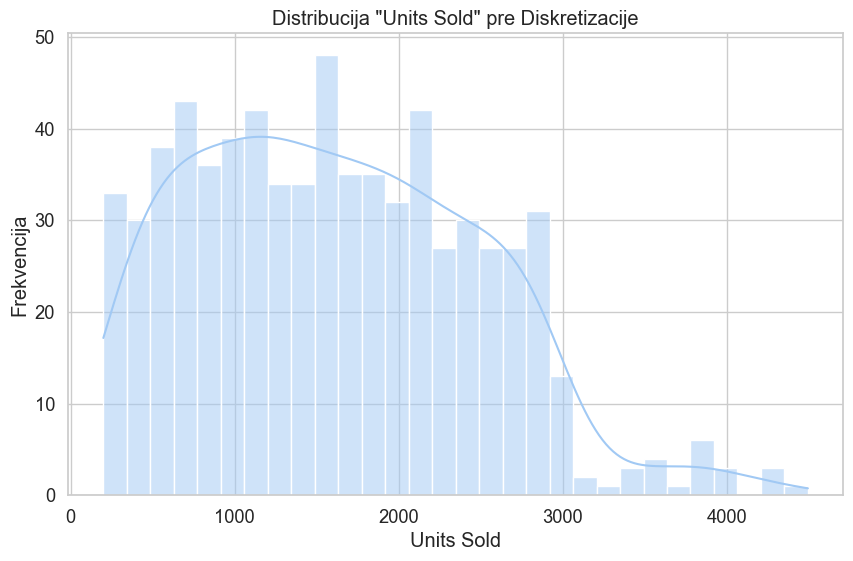

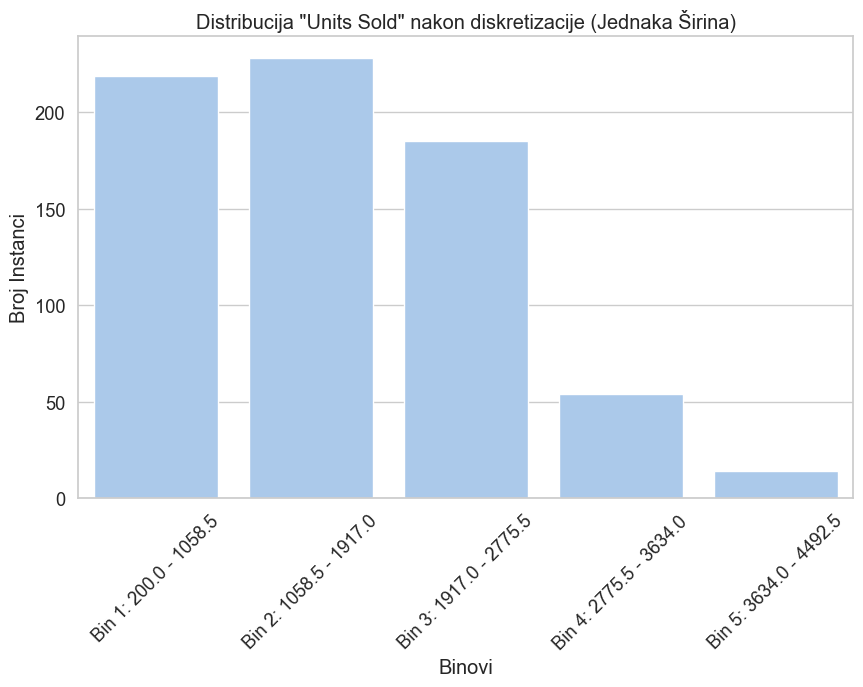

In [43]:
# Prikaz histogram pre diskretizacije
plot_histogram_before_discretization(data, 'Units Sold', 'Units Sold', bins=30)

# Diskretizacija i prikaz distribucije nakon diskretizacije
data_discretized_equal_bins = discretize_and_plot_count_after(data, 'Units Sold', 'Units Sold', n_bins=5, strategy='uniform')


Pre diskretizacije, raspodela vrednosti za Units Sold pokazuje da je više instanci koncentrisano u nižem opsegu vrednosti (između 500 i 2000), dok je manji broj prodajnih jedinica u opsegu iznad 3000. Ova raspodela je blago asimetrična.

Diskretizacija na intervale jednake sirine koristi podelu opsega vrednosti Units Sold na 5 jednakih binova.

Nakon diskretizacije, distribucija podataka je podeljena u 5 opsega (Bin 1 do Bin 5), gde većina instanci pripada prva tri opsega (Bin 1, Bin 2, Bin 3). Samo mali broj instanci pripada Bin 5, što sugeriše da je distribucija i dalje asimetrična.

Ovaj pristup obezbeđuje da svi binovi imaju jednak raspon vrednosti, ali se time ne garantuje da će svi binovi imati približno jednak broj instanci.

#### Podela na intervale sa jednakom frekvencom

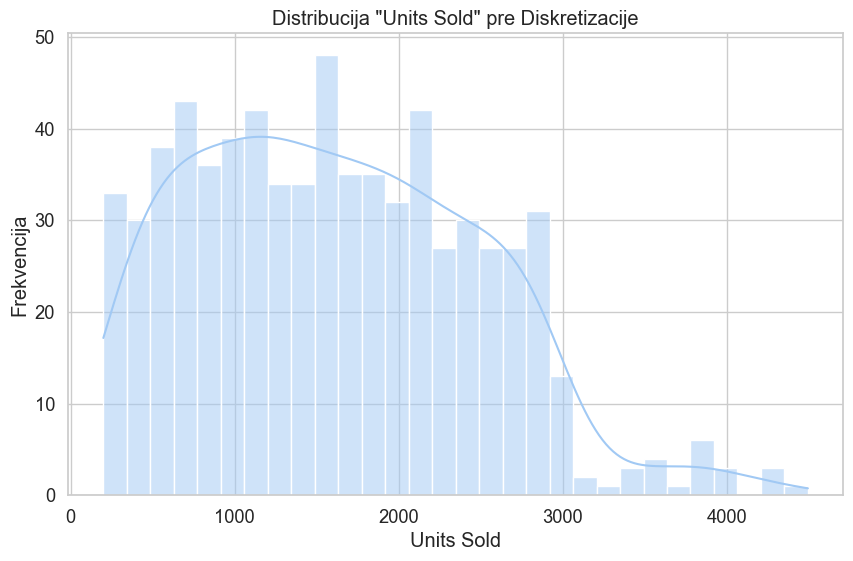

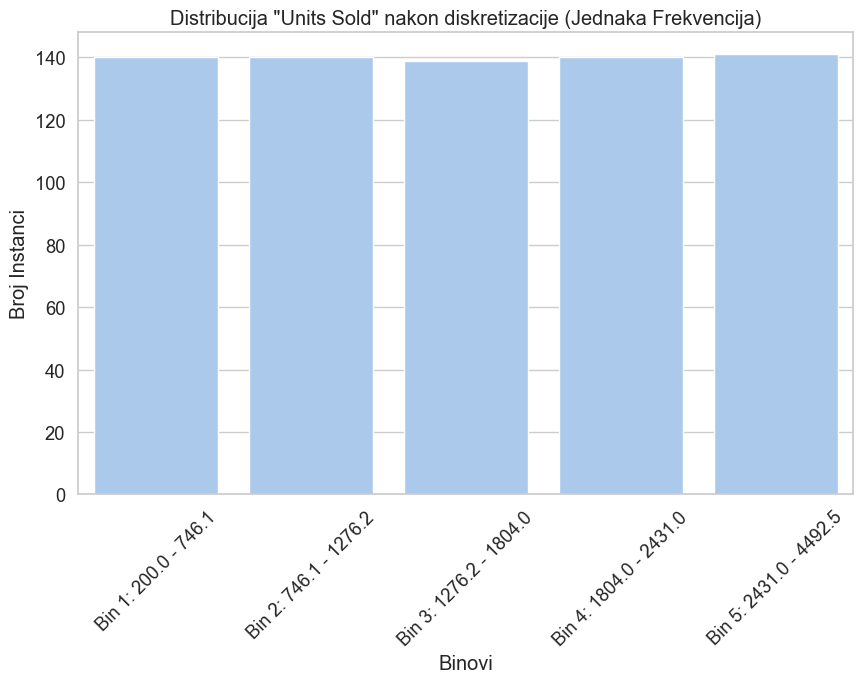

In [44]:
# Prikaz histogram pre diskretizacije
plot_histogram_before_discretization(data, 'Units Sold', 'Units Sold', bins=30)

# Diskretizacija i prikaz distribucije nakon diskretizacije
data_discretized_equal_frequency = discretize_and_plot_count_after(data, 'Units Sold', 'Units Sold', n_bins=5, strategy='quantile')


Diskretizacija na binove sa jednakim brojem instanci deli Units Sold na 5 binova sa jednakim brojem instanci.

Nakon primene ove strategije, svi binovi sadrže približno jednak broj instanci, što znači da su podaci raspodeljeni tako da svaki bin sadrži ~20% ukupnih instanci.

Ovaj pristup pomaže u smanjenju uticaja outliera i ujednačavanju distribucije, što može biti korisno za dalje modeliranje.

#### Diskretizacija koriscenjem klasterizacije

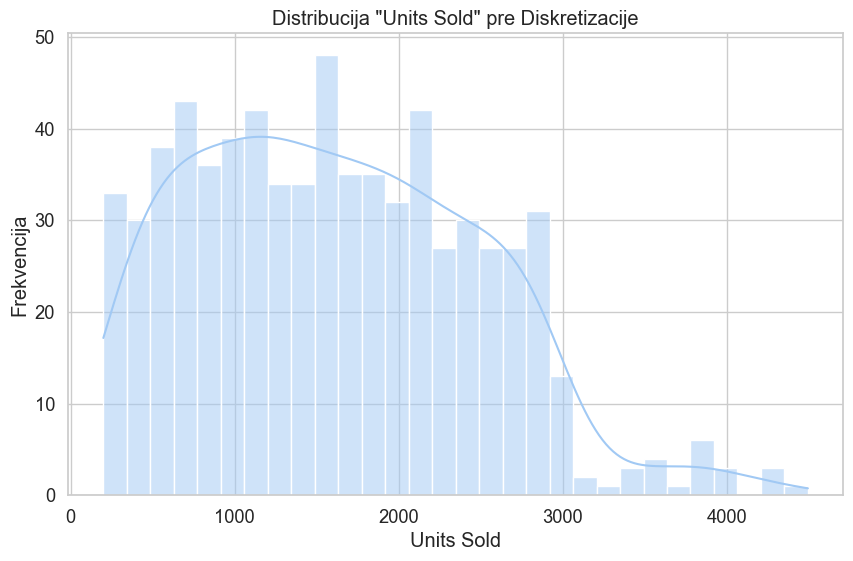

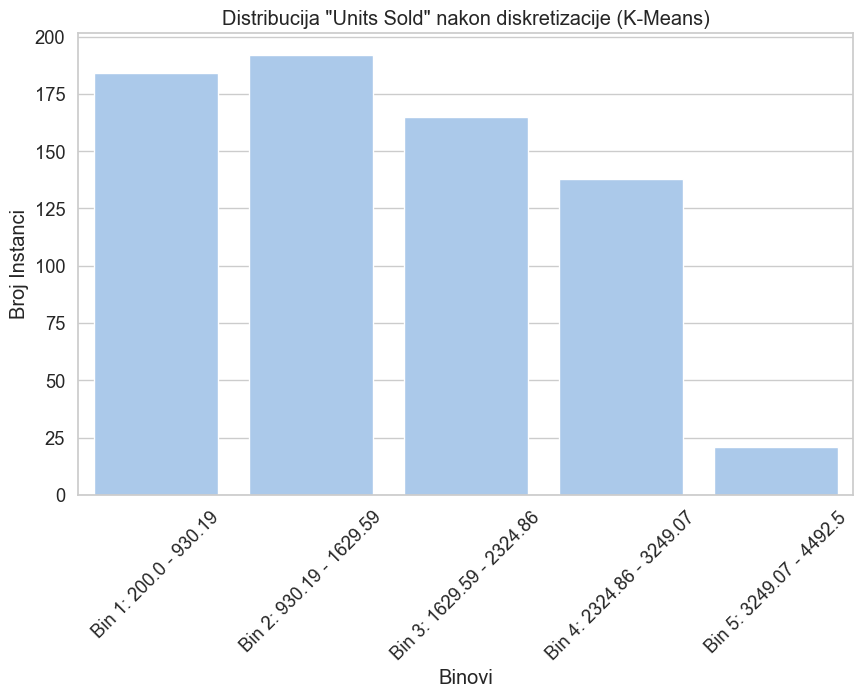

In [45]:
# Prikaz histogram pre diskretizacije
plot_histogram_before_discretization(data, 'Units Sold', 'Units Sold', bins=30)

# Diskretizacija i prikaz distribucije nakon diskretizacije
data_discretized_clustering = discretize_and_plot_count_after(data, 'Units Sold', 'Units Sold', n_bins=5, strategy='kmeans')


K-Means strategija deli Units Sold na 5 binova, ali koristi algoritam klasterizacije da grupiše slične vrednosti.

Nakon primene ove strategije, binovi nisu jednakog raspona niti imaju isti broj instanci, već su grupisani na osnovu sličnosti. Ovaj pristup može biti koristan za otkrivanje prirodnih grupa unutar podataka.

K-Means diskretizacija može rezultirati binovima koji bolje predstavljaju obrasce u podacima, ali je kompleksnija za implementaciju i razumevanje u poređenju sa jednaka širina ili jednaka frekvencija.

#### Diskretizacija koriscenjem stabla odlucivanja

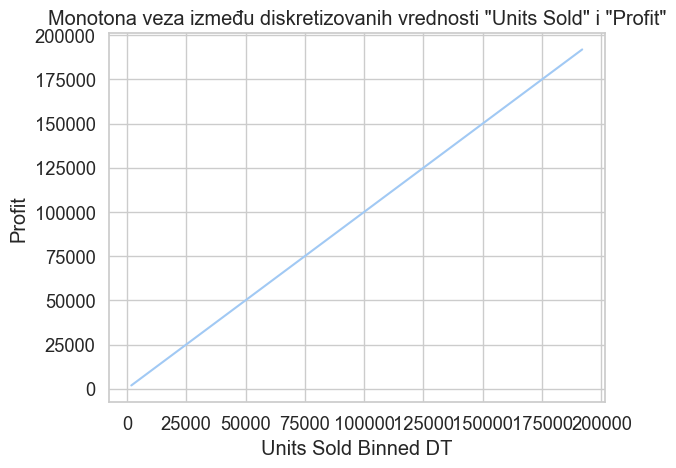

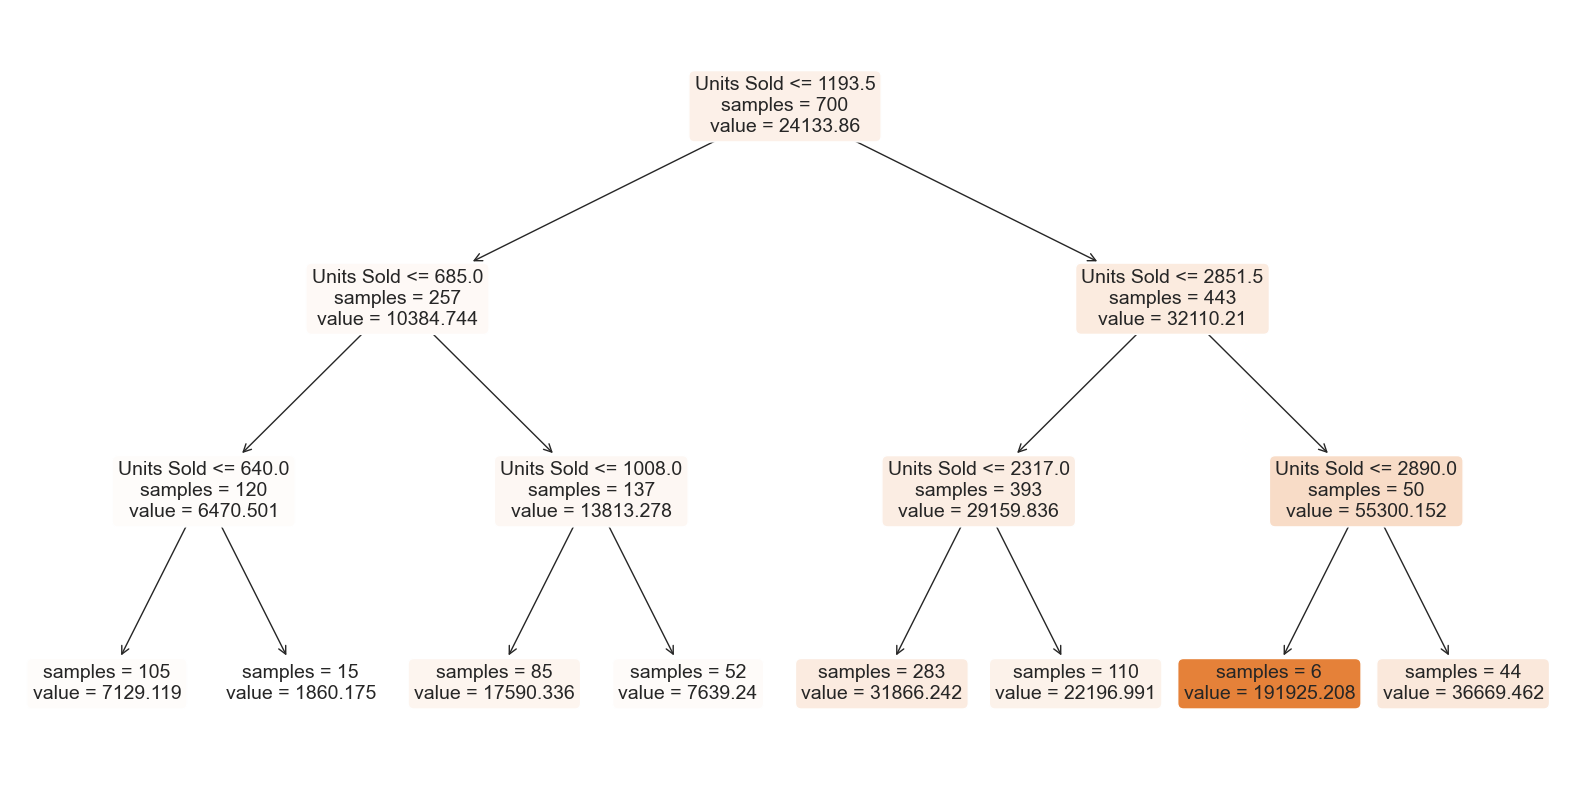

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Kreiranje kopije DataFrame-a za diskretizaciju
data_discretized = data.copy()

# Inicijalizacija DecisionTreeRegressor modela
tree_model = DecisionTreeRegressor(max_depth=3, random_state=43)

# Fitting modela: predviđanje 'Profit' na osnovu 'Units Sold'
tree_model.fit(data_discretized[['Units Sold']], data_discretized['Profit'])

# Predviđanje i kreiranje diskretizovane kolone
data_discretized['Units Sold Binned DT'] = tree_model.predict(data_discretized[['Units Sold']])

sns.lineplot(x=data_discretized['Units Sold Binned DT'],
             y=data_discretized['Profit'], errorbar=None)
plt.title('Monotona veza između diskretizovanih vrednosti "Units Sold" i "Profit"')

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=['Units Sold'],
          filled=True, rounded=True, impurity=False)
plt.show()


Decision Tree strategija koristi regresiono stablo za određivanje intervala (bins) za Units Sold tako da se optimizuje predviđanje Profit vrednosti.
Dobijeni binovi predstavljaju grupisanje vrednosti Units Sold na osnovu njihove veze sa Profit, čime se postiže monotona veza između diskretizovanih vrednosti i ciljne promenljive (Profit).
Ova metoda može pomoći u otkrivanju ključnih tačaka i uloga promenljivih u modelu, ali može zahtevati više vremena za obuku i biti osetljiva na overfitting.
Decision Tree diskretizacija je pogodna kada želimo da postignemo diskretizaciju koja direktno pomaže u predviđanju ciljne promenljive, što može povećati tačnost modela u određenim situacijama.

### Rad sa outlier-ima

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisanje funkcije za vizualizaciju
def plot_visualizations(df, columns, method_name, stage):
    for col in columns:
        plt.figure(figsize=(12, 4))
        
        # Box Plot
        plt.subplot(1, 3, 1)
        sns.boxplot(y=df[col])
        plt.title(f'{method_name} - {stage} - Box Plot of {col}')
        plt.ylabel(col)
        
        # Histogram
        plt.subplot(1, 3, 2)
        sns.histplot(df[col], kde=True)
        plt.title(f'{method_name} - {stage} - Histogram of {col}')
        plt.xlabel(col)
        
        # Scatter Plot
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[col], y=df['Profit'])
        plt.title(f'{method_name} - {stage} - Scatter Plot of {col} vs Profit')
        plt.xlabel(col)
        plt.ylabel('Profit')
        
        plt.tight_layout()
        plt.show()


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisanje funkcije za vizualizaciju outliera pre i posle uklanjanja
def plot_outliers_comparison(df_before, df_after, columns, method_name):
    for col in columns:
        plt.figure(figsize=(20, 4))
        
        # Box Plot pre uklanjanja outliera
        plt.subplot(1, 4, 1)
        sns.boxplot(y=df_before[col], flierprops={'markerfacecolor': 'red', 'markersize': 6})
        plt.title(f'{method_name} - Pre - Box Plot of {col}')
        plt.ylabel(col)
        
        # Box Plot posle uklanjanja outliera
        plt.subplot(1, 4, 2)
        sns.boxplot(y=df_after[col], flierprops={'markerfacecolor': 'red', 'markersize': 6})
        plt.title(f'{method_name} - Posle - Box Plot of {col}')
        plt.ylabel(col)
        
        # Histogram pre uklanjanja outliera
        plt.subplot(1, 4, 3)
        sns.histplot(df_before[col], kde=True, color='skyblue', label='Normal Range')
        
        plt.title(f'{method_name} - Pre - Histogram of {col}')
        plt.xlabel(col)
        plt.legend()
        
        # Histogram posle uklanjanja outliera
        plt.subplot(1, 4, 4)
        sns.histplot(df_after[col], kde=True, color='skyblue', label='Normal Range')
        plt.title(f'{method_name} - Posle - Histogram of {col}')
        plt.xlabel(col)
        plt.legend()
        
        plt.tight_layout()
        plt.show()


#### Z score

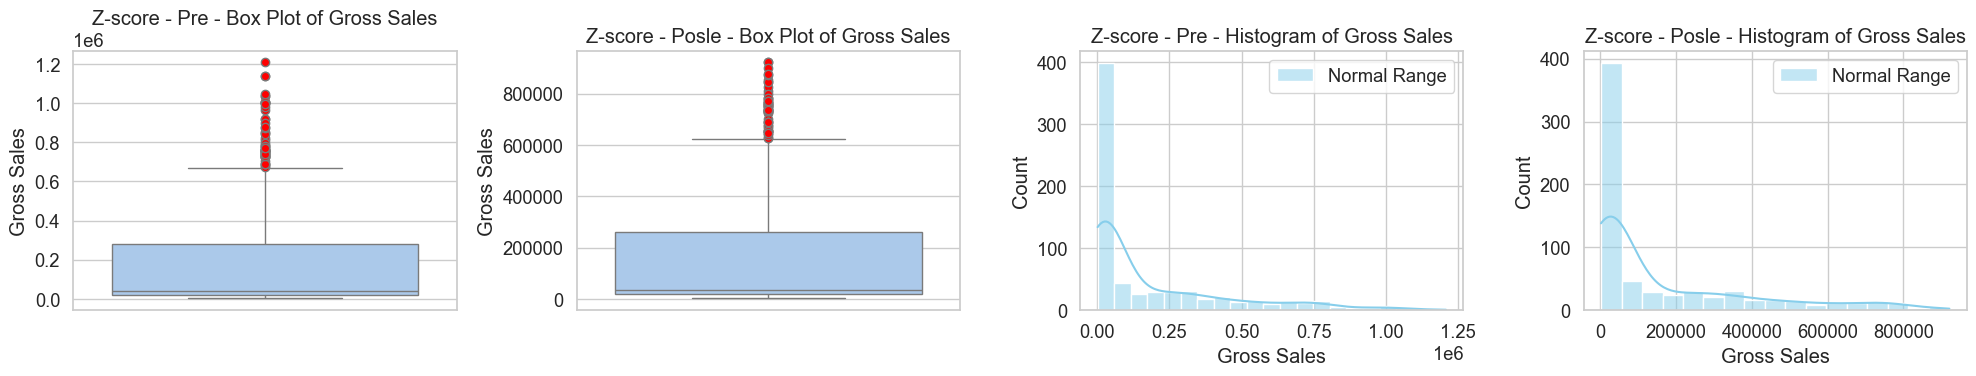

Broj outlier-a detektovanih Z score metodom: 14


In [49]:
from scipy import stats

data_zscore = data.copy()
def detect_outliers_zscore_single(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outlier_indices = df.index[abs(z_scores) > threshold].tolist()
    return outlier_indices

# Detekcija outliera
zscore_outliers = detect_outliers_zscore_single(data_zscore, 'Gross Sales')

# Uklanjanje outliera iz 'Gross Sales' kolone
data_zscore_cleaned = data_zscore.drop(index=zscore_outliers)

# Vizualizacija pre i posle
plot_outliers_comparison(data_zscore, data_zscore_cleaned, ['Gross Sales'], 'Z-score')
print(f"Broj outlier-a detektovanih Z score metodom: {len(zscore_outliers)}")




#### IQR

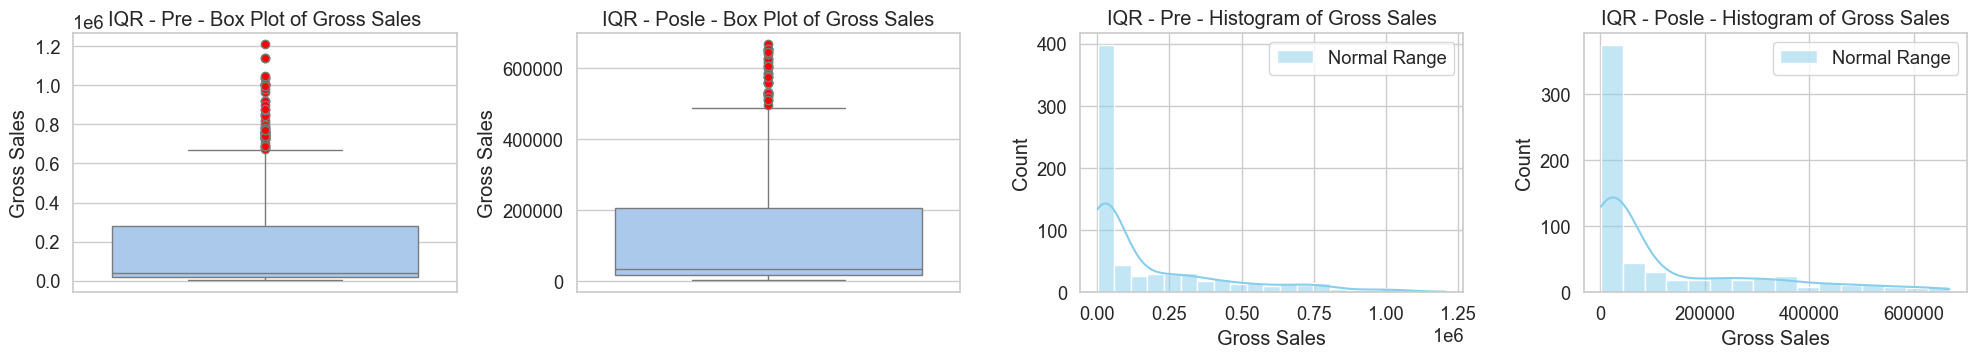

Broj outlier-a detektovanih IQR metodom: 55


In [50]:
# Kopiranje originalnog DataFrame-a za IQR metodu
data_iqr = data.copy()

def detect_outliers_iqr_single(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    outlier_indices = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()
    return outlier_indices

# Detekcija outliera
iqr_outliers = detect_outliers_iqr_single(data_iqr, 'Gross Sales')

# Uklanjanje outliera iz 'Gross Sales' kolone
data_iqr_cleaned = data_iqr.drop(index=iqr_outliers)

# Vizualizacija pre i posle
plot_outliers_comparison(data_iqr, data_iqr_cleaned, ['Gross Sales'], 'IQR')
print(f"Broj outlier-a detektovanih IQR metodom: {len(iqr_outliers)}")



#### Percentil

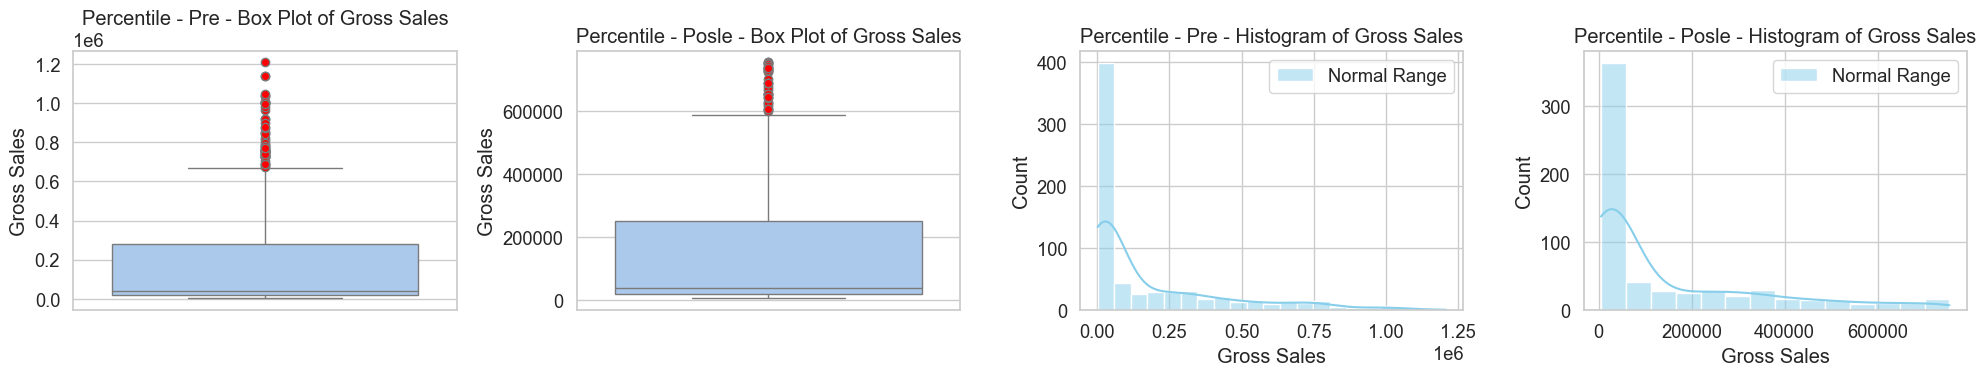

Broj outlier-a detektovanih Percentile metodom: 69


In [51]:
# Kopiranje originalnog DataFrame-a za Percentile metodu
data_percentile = data.copy()

def detect_outliers_percentile_single(df, column, lower_percentile=5, upper_percentile=95):
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)
    outlier_indices = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()
    return outlier_indices

# Detekcija outliera
percentile_outliers = detect_outliers_percentile_single(data_percentile, 'Gross Sales')

# Uklanjanje outliera iz 'Gross Sales' kolone
data_percentile_cleaned = data_percentile.drop(index=percentile_outliers)

# Vizualizacija pre i posle
plot_outliers_comparison(data_percentile, data_percentile_cleaned, ['Gross Sales'], 'Percentile')
print(f"Broj outlier-a detektovanih Percentile metodom: {len(percentile_outliers)}")


#### DBScan

In [52]:
# Kopiranje originalnog DataFrame-a za DBSCAN metodu
data_dbscan = data.copy()

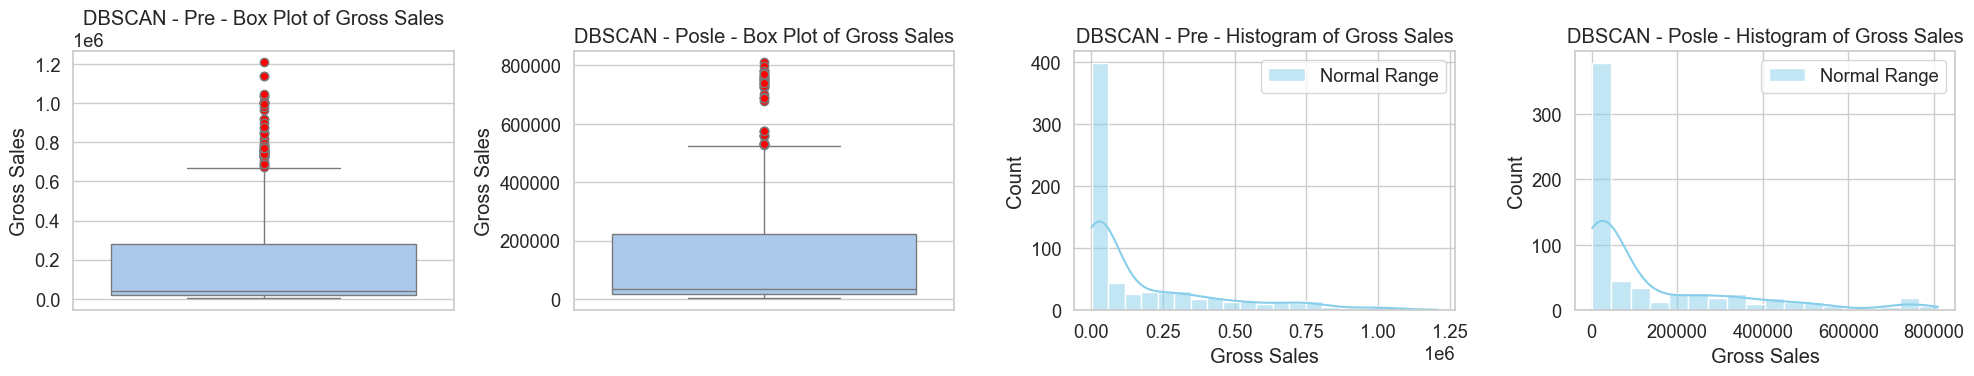

Broj outlier-a detektovanih DBScan metodom: 42


In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def detect_outliers_dbscan_single(df, column, eps=0.2, min_samples=25):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[[column]])

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X_scaled)

    labels = dbscan.labels_
    outlier_indices = df.index[labels == -1].tolist()
    return outlier_indices

# Detekcija outliera
dbscan_outliers = detect_outliers_dbscan_single(data_dbscan, 'Gross Sales')

# Uklanjanje outliera iz 'Gross Sales' kolone
data_dbscan_cleaned = data_dbscan.drop(index=dbscan_outliers)

# Vizualizacija pre i posle
plot_outliers_comparison(data_dbscan, data_dbscan_cleaned, ['Gross Sales'], 'DBSCAN')
print(f"Broj outlier-a detektovanih DBScan metodom: {len(dbscan_outliers)}")


#### Isolation Forest

In [54]:
# Kopiranje originalnog DataFrame-a za Isolation Forest metodu
data_iso_forest = data.copy()

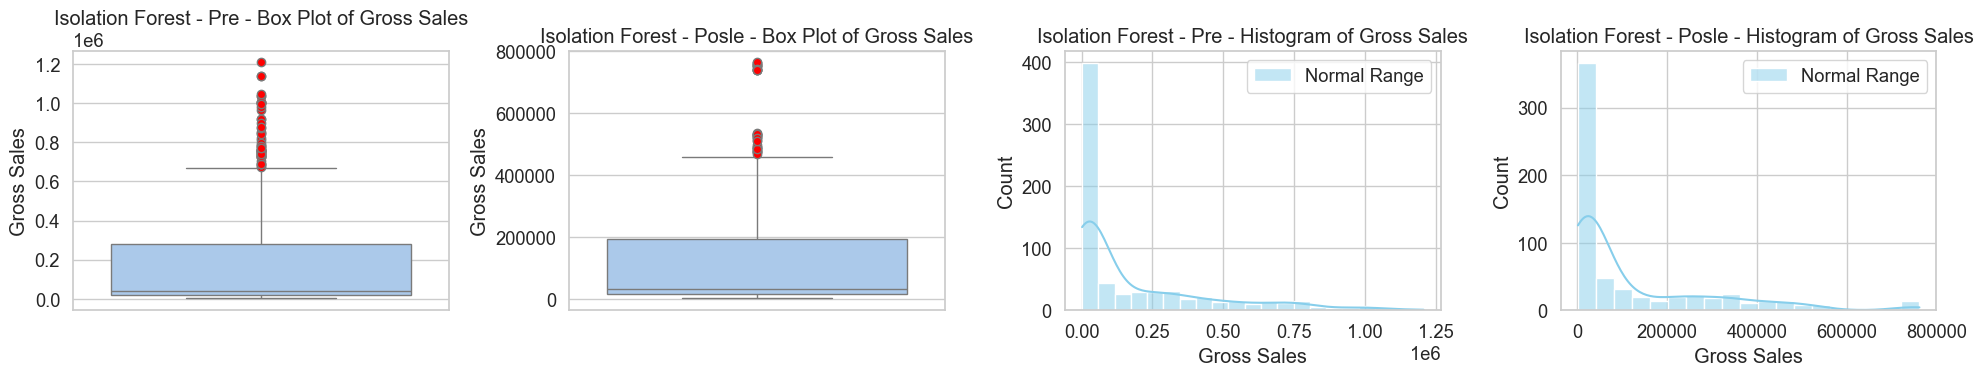

Broj outlier-a detektovanih Isolation Forest metodom: 69


In [55]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest_single(df, column, contamination=0.1):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(df[[column]])

    y_pred = iso_forest.predict(df[[column]])
    outlier_indices = df.index[y_pred == -1].tolist()
    return outlier_indices

# Detekcija outliera
iso_forest_outliers = detect_outliers_isolation_forest_single(data_iso_forest, 'Gross Sales')

# Uklanjanje outliera iz 'Gross Sales' kolone
data_iso_forest_cleaned = data_iso_forest.drop(index=iso_forest_outliers)

# Vizualizacija pre i posle
plot_outliers_comparison(data_iso_forest, data_iso_forest_cleaned, ['Gross Sales'], 'Isolation Forest')
print(f"Broj outlier-a detektovanih Isolation Forest metodom: {len(iso_forest_outliers)}")



### Feature Creation

Na osnovu postojećih atributa, možemo kreirati novi atribut koji predstavlja, na primer, odnos između 'Gross Sales' i 'COGS' (Cost of Goods Sold), što bi moglo pružiti dodatni uvid u profitabilnost:

In [56]:
data['Profit Margin'] = data['Profit'] / data[' Sales']


In [57]:
data['Manufacturing Cost'] = data['Manufacturing Price'] * data['Units Sold']

Kreirajte polinomske verzije određenih atributa kako bismo modelu omogućili da prepozna nelinearne odnose. Na primer, kvadratna verzija broja prodatih jedinica:


In [58]:
data['Units Sold Squared'] = data['Units Sold'] ** 2

Možemo kreirati agregirane karakteristike poput prosečne prodaje po mesecu.
Ovo omogućava modelu da koristi sezonske obrasce.


In [59]:
avg_sales_per_month = data.groupby('Month Name')[' Sales'].mean()
data['Avg Sales per Month'] = data['Month Name'].map(avg_sales_per_month)

Možemo kreirati atribut koji predstavlja ukupan prihod kombinovanjem atributa 'Sales' i 'Discounts':
Ovaj sintetički atribut sažima informacije o neto prihodima.

In [60]:
data['Net Sales'] = data[' Sales'] - data['Discounts']

Kreirajte nove karakteristike koje predstavljaju interakcije između postojećih. Na primer, interakcija između 'Units Sold' i 'Sale Price' može ukazivati na ukupne prihode od prodatih jedinica:


In [61]:
data['Total Revenue'] = data['Units Sold'] * data['Sale Price']

Na osnovu atributa 'Date', možemo kreirati karakteristike kao što su dan u nedelji, kvartal, ili sezona:


In [62]:
data['Day of Week'] = pd.to_datetime(data['Date']).dt.dayofweek
data['Is Weekend'] = data['Day of Week'].isin([5, 6])
data['Quarter'] = pd.to_datetime(data['Date']).dt.quarter


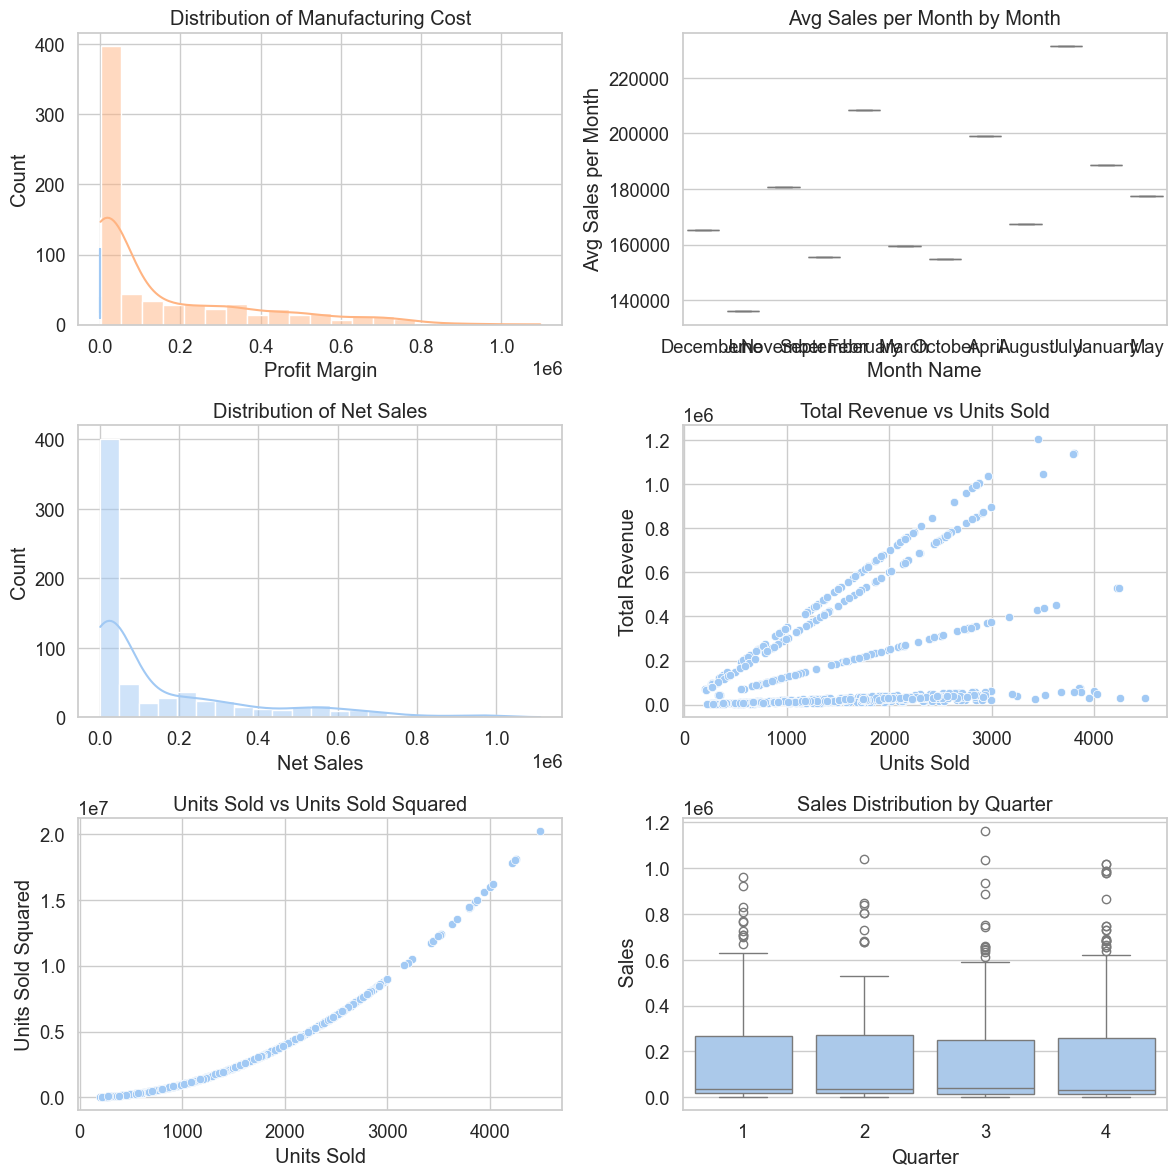

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Distribution of 'Profit Margin'
sns.histplot(data['Profit Margin'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Profit Margin')

sns.histplot(data['Manufacturing Cost'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Manufacturing Cost')

# Average Sales per Month
sns.boxplot(x='Month Name', y='Avg Sales per Month', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Avg Sales per Month by Month')

# Net Sales distribution
sns.histplot(data['Net Sales'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Net Sales')

# Interaction: Total Revenue
sns.scatterplot(x='Units Sold', y='Total Revenue', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Total Revenue vs Units Sold')

# Polynomial Feature: Units Sold^2
sns.scatterplot(x='Units Sold', y='Units Sold Squared', data=data, ax=axs[2, 0])
axs[2, 0].set_title('Units Sold vs Units Sold Squared')

# Temporal Feature: Sales by Quarter
sns.boxplot(x='Quarter', y=' Sales', data=data, ax=axs[2, 1])
axs[2, 1].set_title('Sales Distribution by Quarter')

plt.tight_layout()
plt.show()
